In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import numpy as np
np.random.seed(10)

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import recall_score,precision_score,accuracy_score
from sklearn.metrics import confusion_matrix

import seaborn as sns 

import pandas as pd

from sklearn import svm

import datetime

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

Using TensorFlow backend.


In [3]:
starttime = datetime.datetime.now()

In [4]:
import re
import numpy as np
chn_pattern ="[\u4e00-\u9fa5]+"
regex_chn = re.compile(chn_pattern)

In [5]:
c_path = './data/email_2017.txt'
b_path = './data/fake_email.txt'
# unknown_path = './data/email_2017.txt'
stop_words_path = './data/stopwords.txt'

In [6]:
def load_stop_words():
    stop_words_vec = []
    with open(stop_words_path,'r') as f:
        for line in f.readlines():
            stop_words_vec.append(line.strip('\n'))
    return stop_words_vec

In [7]:
def parser(path,security_group):
    line_vec = [];group=[]
    with open(path,'r',encoding='utf8') as f:
        f = f.readlines()
        for line in f:
            tmp = regex_chn.findall(line)
            if not tmp:
                continue
            line_vec.append(tmp)
            group.append(security_group)
    return np.asarray(line_vec),group    

def parser(path,security_group):
    line_vec = [];group=[]
    with open(path,'r',encoding='utf8') as f:
        f = f.readlines()
        for line in f:
            tmp = regex_chn.findall(line)
            if not tmp:
                continue
            line_vec.append(tmp)
            group.append(security_group)
    return np.asarray(line_vec),group    

In [8]:
c_vec,c_group = parser(c_path,'C')
b_vec,b_group = parser(b_path,'B')
# unknown_vec,_= parser(unknown_path,'-')
stop_words_vec = load_stop_words()

In [9]:
all_vec = np.r_[c_vec,b_vec]
# print(len(all_vec))
j = 1
for content in all_vec :
    print('Index:{}  Content:{}'.format(j,content))
    j = j+1

Index:1  Content:['新人三個月請客', '敬邀各位前輩於', '享用下午茶']
Index:2  Content:['停機公告', '二', '五', '微軟', '重大更新', '提醒', '今天', '中午', '會', '做', '所有', '相關', '上午', '下午', '停機', '公告', '二', '五', '微軟', '重大', '更新', '全廠', '與', '相關', '微軟', '年', '月', '與', '重大', '更新', '系統', '停機', '時間', '如下', '星期二', '所有', '產線', '相關', '星期五', '所有', '相關', '詳細', '內容', '請', '參照', '內容']
Index:3  Content:['停機公告', '三', '五', '微軟', '重大更新', '提醒', '今天', '中午', '所有', '會', '做']
Index:4  Content:['停機公告', '三', '五', '微軟', '重大更新', '今日', '作業', '已', '全部', '完成', '造成', '不便', '請', '多多', '見諒', '謝謝']
Index:5  Content:['公告', '因系統維護重建', '重開機', '因', '系統', '維護', '重建', '重', '開機']
Index:6  Content:['課程資訊', '報名', '以下', '是', '兩', '堂', '關於', '的', '課程', '資訊', '欲', '參加', '者請', '點擊', '連結', '報名', '請', '使用', '或', '版本', '以上', '之', '瀏覽器', '開啟', '編輯', '統計', '至下', '周三', '謝謝']
Index:7  Content:['明天', '我', '有', '客戶', '要來', '煩請', '幫忙', '開', '感謝']
Index:8  Content:['煩請協助防毒軟體', '當機', '掃一掃後自動跑到開機畫面', '煩請協助處理', '謝謝', '機台', '廠商', '確認', '是', '防毒', '軟體', '造成', '電腦', '當機', '希望', '能', 

Index:2941  Content:['麻煩協助提供', '密碼', '謝謝你', '多加', '了', '三', '位', '麻煩', '協助', '提供', '下周', '客戶', '來訪', '的', '密碼', '謝謝', '你']
Index:2942  Content:['請提供', '客戶', '今日', '謝謝', '麻煩協助提供', '密碼', '謝謝你', '麻煩', '協助', '提供', '這', '周', '客戶', '來訪', '的', '密碼', '謝謝', '你']
Index:2943  Content:['麻煩協助提供', '密碼', '謝謝你', '麻煩', '協助', '提供', '下周', '客戶', '來訪', '的', '密碼', '謝謝', '你']
Index:2944  Content:['麻煩協助提供', '密碼', '謝謝你', '麻煩', '協助', '提供', '下', '禮拜', '一', '客戶', '來訪', '的', '密碼', '謝謝', '你']
Index:2945  Content:['麻煩協助提供', '密碼', '謝謝你', '麻煩', '協助', '提供', '這禮拜', '五', '以下', '三位', '客戶', '來訪', '的', '密碼', '謝謝', '你']
Index:2946  Content:['網路', '門禁網路', '考勤網路已完成請配合改接', '謝謝', '中控室', '網點', '已', '完成', '昨日', '已', '現場', '測試', '完成', '請', '於本', '週五', '五', '將', '接到', '舊', '網孔', '的', '網路', '改', '接到', '新', '增加', '的', '網孔', '新設', '網孔', '位置', '照', '需求單', '位置', '施作', '於', '高架', '地板', '上', '有', '標明', '網孔', '編號', '另', '門禁', '網路', '已', '照', '最後', '決議', '拉到', '門禁', '控制箱', '內', '請於', '五', '前', '完成', '門禁', '網路', '改接', '一', '開始', '拆除', '舊有', '

In [ ]:
# b_vec_index = list(range(0,c_vec.shape[0]))
# c_vec_index = list(range(c_vec.shape[0],c_vec.shape[0]+b_vec.shape[0]))
# unknown_vec_index = list(range(c_vec.shape[0]+b_vec.shape[0],c_vec.shape[0]+b_vec.shape[0]+unknown_vec.shape[0]))

# 分群 kmeans Clustering

In [10]:
new_vec = []
for item in all_vec:
    string = " ".join(item)
    new_vec.append(string)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(new_vec)

X = X.toarray()

#kmeans Clustering

# kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
# labels = kmeans.predict(X)
# print(len(labels))

# i = 1

# for L in labels:     # 第一个实例
#     print('Index:{}  Lebal:{}'.format(i,L))
#     i = i+1


# 分群 Hierarchical Clustering

In [11]:
# Hierarchical Clustering
hclust = AgglomerativeClustering(linkage = 'complete', affinity = 'euclidean', n_clusters = 27)

# 印出分群結果
hclust.fit(X)
cluster_labels = hclust.labels_

i = 1

for L in cluster_labels:     # 第一个实例
    print('Index:{}  Lebal:{}'.format(i,L))
    i = i+1

print('------------------------------')
# #securityB
adj_lebels = np.array(cluster_labels)


adj_lebels[adj_lebels == 4] = 99
adj_lebels[adj_lebels == 5] = 99
adj_lebels[adj_lebels == 8] = 99
adj_lebels[adj_lebels == 12] = 99
adj_lebels[adj_lebels == 14] = 99
adj_lebels[adj_lebels == 15] = 99
adj_lebels[adj_lebels == 16] = 99
adj_lebels[adj_lebels == 18] = 99
adj_lebels[adj_lebels == 21] = 99
adj_lebels[adj_lebels == 23] = 99

#securityC
adj_lebels[adj_lebels == 0] = 88
adj_lebels[adj_lebels == 1] = 88
adj_lebels[adj_lebels == 2] = 88
adj_lebels[adj_lebels == 3] = 88
adj_lebels[adj_lebels == 6] = 88
adj_lebels[adj_lebels == 7] = 88
adj_lebels[adj_lebels == 9] = 88
adj_lebels[adj_lebels == 10] = 88
adj_lebels[adj_lebels == 11] = 88
adj_lebels[adj_lebels == 13] = 88
adj_lebels[adj_lebels == 17] = 88
adj_lebels[adj_lebels == 19] = 88
adj_lebels[adj_lebels == 20] = 88
adj_lebels[adj_lebels == 22] = 88
adj_lebels[adj_lebels == 24] = 88
adj_lebels[adj_lebels == 25] = 88
adj_lebels[adj_lebels == 26] = 88

# Security B
adj_lebels[adj_lebels == 99] = 1
# SecurityC
adj_lebels[adj_lebels == 88] = 0

# i = 1
# b = 0
# c = 0
# for L in adj_lebels:     # 第一个实例
#     print('Index:{}  Lebal:{}'.format(i,L))
#     if L == 1 :
#         b = b + 1
#     else :
#         c = c + 1
#     i = i + 1
    
# print('b => {}, c => {}'.format(b,c))


Index:1  Lebal:1
Index:2  Lebal:20
Index:3  Lebal:20
Index:4  Lebal:20
Index:5  Lebal:0
Index:6  Lebal:10
Index:7  Lebal:16
Index:8  Lebal:3
Index:9  Lebal:2
Index:10  Lebal:20
Index:11  Lebal:8
Index:12  Lebal:25
Index:13  Lebal:0
Index:14  Lebal:4
Index:15  Lebal:3
Index:16  Lebal:3
Index:17  Lebal:5
Index:18  Lebal:5
Index:19  Lebal:9
Index:20  Lebal:4
Index:21  Lebal:5
Index:22  Lebal:20
Index:23  Lebal:5
Index:24  Lebal:5
Index:25  Lebal:3
Index:26  Lebal:3
Index:27  Lebal:3
Index:28  Lebal:7
Index:29  Lebal:4
Index:30  Lebal:0
Index:31  Lebal:5
Index:32  Lebal:4
Index:33  Lebal:7
Index:34  Lebal:7
Index:35  Lebal:7
Index:36  Lebal:4
Index:37  Lebal:19
Index:38  Lebal:6
Index:39  Lebal:20
Index:40  Lebal:0
Index:41  Lebal:13
Index:42  Lebal:7
Index:43  Lebal:4
Index:44  Lebal:13
Index:45  Lebal:4
Index:46  Lebal:4
Index:47  Lebal:19
Index:48  Lebal:19
Index:49  Lebal:16
Index:50  Lebal:5
Index:51  Lebal:16
Index:52  Lebal:6
Index:53  Lebal:7
Index:54  Lebal:17
Index:55  Lebal:22
I

Index:3245  Lebal:6
Index:3246  Lebal:4
Index:3247  Lebal:11
Index:3248  Lebal:5
Index:3249  Lebal:19
Index:3250  Lebal:20
Index:3251  Lebal:22
Index:3252  Lebal:11
Index:3253  Lebal:10
Index:3254  Lebal:5
Index:3255  Lebal:0
Index:3256  Lebal:11
Index:3257  Lebal:11
Index:3258  Lebal:11
Index:3259  Lebal:11
Index:3260  Lebal:16
Index:3261  Lebal:5
Index:3262  Lebal:11
Index:3263  Lebal:8
Index:3264  Lebal:5
Index:3265  Lebal:26
Index:3266  Lebal:0
Index:3267  Lebal:4
Index:3268  Lebal:12
Index:3269  Lebal:4
Index:3270  Lebal:8
Index:3271  Lebal:0
Index:3272  Lebal:5
Index:3273  Lebal:0
Index:3274  Lebal:4
Index:3275  Lebal:12
Index:3276  Lebal:20
Index:3277  Lebal:5
Index:3278  Lebal:8
Index:3279  Lebal:9
Index:3280  Lebal:5
Index:3281  Lebal:0
Index:3282  Lebal:2
Index:3283  Lebal:19
Index:3284  Lebal:12
Index:3285  Lebal:16
Index:3286  Lebal:4
Index:3287  Lebal:20
Index:3288  Lebal:20
Index:3289  Lebal:25
Index:3290  Lebal:19
Index:3291  Lebal:2
Index:3292  Lebal:9
Index:3293  Lebal

# 分類

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, adj_lebels, test_size=0.2)

# LSTM

In [13]:
# max_features = 2048
# batch_size = 40

# model = Sequential()

# #堆疊model
# model.add(Embedding(max_features, output_dim=256))
# model.add(LSTM(128))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

# #model.fit(X_train, y_train, batch_size=32, epochs=2)
# model.fit(X_train, y_train, batch_size=16, epochs=5)

# lstm_pred_prob = model.predict_proba(X_test)
# lstm_pred_binary = model.predict(X_test)


# ROC Curve

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.77758163 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[0 0 0 ... 0 0 0]
rf END
GBDT END
KNN END
SVM END


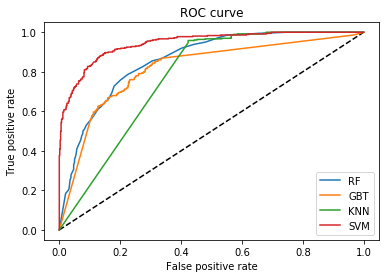

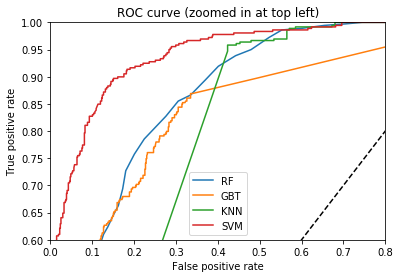

In [13]:
n_estimator = 50
#Randon forest
rf = RandomForestClassifier(max_depth=None, n_estimators=n_estimator, max_features='auto')
rf = rf.fit(X_train,y_train)
print(X_train)
print(y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
print('rf END')

#GBDT
gbdt = GradientBoostingClassifier(max_depth=None, n_estimators=n_estimator, max_features='auto')
gbdt = gbdt.fit(X_train,y_train)
y_pred_gbdt = gbdt.predict_proba(X_test)[:, 1]
fpr_gbdt, tpr_gbdt, _ = roc_curve(y_test, y_pred_gbdt)
print('GBDT END')

# The random forest model by itself
#KNN
knn = KNeighborsClassifier(n_neighbors=5, weights= 'distance')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
print('KNN END')

#LSTM
# fpr_lstm, tpr_lstm, _ = roc_curve(y_test,lstm_pred_prob)

#SVM
svc = svm.SVC(C=5.0, kernel='rbf', gamma=0.3, probability=True)
svc_fit = svc.fit(X_train, y_train)
y_pred_svm = svc.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
print('SVM END')


plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_gbdt, tpr_gbdt, label='GBT')
plt.plot(fpr_knn, tpr_knn, label='KNN')
# plt.plot(fpr_lstm, tpr_lstm, label='LSTM')
plt.plot(fpr_svm, tpr_svm, label='SVM')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.8)
plt.ylim(0.6, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_gbdt, tpr_gbdt, label='GBT')
plt.plot(fpr_knn, tpr_knn, label='KNN')
# plt.plot(fpr_lstm, tpr_lstm, label='LSTM')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

# precision and recall score

In [14]:
y_pred_rf_binary = rf.predict(X_test)
y_pred_gbdt_binary = gbdt.predict(X_test)
y_pred_knn_binary = knn.predict(X_test)
# y_pred_lstm_binary = lstm_pred_binary
y_pred_gbdt_binary = gbdt.predict(X_test)
y_pred_svm_binary = svc.predict(X_test)




In [15]:
# lstm_pred_binary_ =[]
# for item in lstm_pred_binary:
#     if item>=0.5:
#         lstm_pred_binary_.append(1)
#     else:
#         lstm_pred_binary_.append(0)
# lstm_precision = precision_score(y_test, lstm_pred_binary_)
# lstm_recall = recall_score(y_test, lstm_pred_binary_)

knn_precision = precision_score(y_test,y_pred_knn_binary)
knn_recall = recall_score(y_test,y_pred_knn_binary)

gbdt_precision  = precision_score(y_test,y_pred_gbdt_binary)
gbdt_recall = recall_score(y_test,y_pred_gbdt_binary)

rf_precision = precision_score(y_test, y_pred_rf_binary)
rf_recall = recall_score(y_test, y_pred_rf_binary)

svm_precision = precision_score(y_test, y_pred_svm_binary)
svm_recall = recall_score(y_test, y_pred_svm_binary)


 
 
# print('lstm precision score is {}, recall score is {}'.format(lstm_precision,lstm_recall))
print('RandomFirest precision score is {}, recall score is {}'.format(rf_precision,rf_recall))
print('GBDT precision score is {}, recall score is {}'.format(gbdt_precision,gbdt_recall))
print('KNN precision score is {}, recall score is {}'.format(knn_precision,knn_recall))
# print('lstm precision score is {}, recall score is {}'.format(lstm_precision,lstm_recall))
print('SVM precision score is {}, recall score is {}'.format(svm_precision,svm_recall))
print('-----------------------------------------------------')

knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn_binary,labels=[1,0])
gbdt_confusion_matrix = confusion_matrix(y_test, y_pred_gbdt_binary,labels=[1,0])
rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf_binary,labels=[1,0])
svm_confusion_matrix = confusion_matrix(y_test, y_pred_svm_binary,labels=[1,0])
# lstm_confusion_matrix = confusion_matrix(y_test, lstm_pred_binary_,labels=[1,0])

print(rf_confusion_matrix)
print(gbdt_confusion_matrix)
print(knn_confusion_matrix)
# print(lstm_confusion_matrix)
print(svm_confusion_matrix)


RandomFirest precision score is 0.7389705882352942, recall score is 0.5598885793871866
GBDT precision score is 0.6836158192090396, recall score is 0.6740947075208914
KNN precision score is 0.45699614890885754, recall score is 0.9916434540389972
SVM precision score is 0.8888888888888888, recall score is 0.713091922005571
-----------------------------------------------------
[[201 158]
 [ 71 607]]
[[242 117]
 [112 566]]
[[356   3]
 [423 255]]
[[256 103]
 [ 32 646]]


In [16]:
# X_train, X_test, y_train, y_test = train_test_split(X, adj_lebels, test_size=0.2)

# KNN = KNeighborsClassifier(n_neighbors=2)
# KNN.fit(X_train, y_train)
# y_predict = KNN.predict(X_test)

# knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn_binary)


# print("accuracy score:", accuracy_score(y_test, y_predict))

# df_cm = pd.DataFrame(knn_confusion_matrix)
# sns.heatmap(df_cm)

# plt.xlabel("predicted value")
# plt.ylabel("true value")
# plt.show()

In [17]:
endtime = datetime.datetime.now()
print ((endtime - starttime).seconds)

5305


In [18]:
log = open('./data/log.txt', 'a')

log.write('RandomFirest precision score is {}, recall score is {} \n'.format(rf_precision,rf_recall))
log.write('GBDT precision score is {}, recall score is {} \n'.format(gbdt_precision,gbdt_recall))
log.write('KNN precision score is {}, recall score is {} \n'.format(knn_precision,knn_recall))
# log.write('LSTM precision score is {}, recall score is {} \n'.format(lstm_precision,lstm_recall))
log.write('SVM precision score is {}, recall score is {} \n'.format(svm_precision,svm_recall))

log.write(str(rf_confusion_matrix)+'\n')
log.write(str(gbdt_confusion_matrix)+'\n')
log.write(str(knn_confusion_matrix)+'\n')
# log.write(str(lstm_confusion_matrix)+'\n')
log.write(str(svm_confusion_matrix)+'\n')

log.write('-----------{}-----------\n'.format(datetime.datetime.now()))
log.close()